# 1. Regular expressions & word tokenization

Bab ini akan memperkenalkan beberapa konsep NLP dasar, seperti **word tokenization dan regular expressions** untuk membantu mengurai teks. Anda juga akan belajar cara menangani teks non-Inggris dan tokenisasi yang lebih sulit yang mungkin Anda temukan.

## Introduction to regular expressions

### What is Natural Language Processing?

* Bidang studi yang difokuskan pada pemahaman bahasa
  * Menggunakan statistik dan komputer
* Anda akan mempelajari dasar-dasar NLP
  * Identifikasi topik
  * Klasifikasi teks
* Aplikasi NLP meliputi:
  * Chatbots
  * Terjemahan
  * Analisis sentimen
  * ...dan masih banyak lagi!

### What exactly are regular expressions?

* String dengan sintaks khusus
* Memungkinkan kita untuk mencocokkan pola di string lain
* Aplikasi dari regular expressions:
  * Temukan semua tautan web dalam dokumen
  * Parsing alamat email, hapus/ganti karakter yang tidak diinginkan

In [19]:
# Import the regex module
import re

re.match('abc', 'abcdef')

<re.Match object; span=(0, 3), match='abc'>

In [10]:
word_regex = '\w+'
re.match(word_regex, 'hi there!')

<re.Match object; span=(0, 2), match='hi'>

### Common regex patterns

<img src="datasets/regex-cheat.png" width=500px height=500px align=left />

### Python's re Module

* `re` module
* `split`: pisahkan string pada regex
* `findall`: temukan semua pola dalam sebuah string
* `search`: mencari sebuah pola
* `match`: mencocokkan dengan seluruh string atau substring berdasarkan suatu pola
* Pola pertama, dan string kedua
* Dapat mengembalikan iterator, string, atau objek yang cocok

In [11]:
re.split('\s+', 'Split on spaces.')

['Split', 'on', 'spaces.']

### Pattern

In [12]:
my_string = "Let's write RegEx!"

PATTERN = r"\w+"
re.findall(PATTERN, my_string)

['Let', 's', 'write', 'RegEx']

### `re.split()` and `re.findall()`

Sekarang Anda akan mendapatkan kesempatan untuk menulis beberapa Regex untuk mencocokkan digit, string dan karakter non-alfanumerik. Lihatlah `my_string` terlebih dahulu dengan mencetaknya di IPython Shell, untuk menentukan bagaimana pola paling cocok dengan langkah-langkah yang berbeda.

In [13]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"
print(my_string)

Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?


Catatan: Sangat penting untuk mengawali pola regex Anda dengan `r` untuk memastikan bahwa pola Anda diinterpretasikan dengan cara yang Anda inginkan. Selain itu, Anda mungkin menemui masalah dengan *escape sequences* dalam string. Misalnya, `"\n"` dalam Python digunakan untuk menunjukkan baris baru, tetapi jika Anda menggunakan awalan `r`, itu akan ditafsirkan sebagai string mentah `"\n"` - yaitu, karakter `"\"` diikuti oleh karakter `"n"` - dan bukan sebagai baris baru.

*Ingat, bahwa sintaks untuk library regex adalah untuk selalu melalui **pola pertama**, dan kemudian **string kedua**.*

In [20]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']


In [16]:
# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

['Let', 'RegEx', 'Won', 'Can', 'Or']


In [22]:
# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']


In [18]:
# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

['4', '19']


**Catatan** : Praktek adalah kunci untuk menguasai RegEx.

## Introduction to tokenization

### What is tokenization?

* Mengubah string atau dokumen menjadi **tokens** (potongan yang lebih kecil)
* Satu langkah dalam mempersiapkan teks untuk NLP
* Banyak teori dan aturan yang berbeda
* Anda dapat membuat aturan sendiri menggunakan RegEx
* Beberapa contoh:
  * Mengurai kata-kata atau kalimat
  * Memisahkan tanda baca
  * Memisahkan semua tagar dalam tweet

### `nltk` library

* **nltk**: *natural language toolkit*

In [26]:
# Installing library nltk
# !pip install nltk

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
from nltk.tokenize import word_tokenize

word_tokenize("Hi there!")

['Hi', 'there', '!']

### Why tokenize?

* Lebih mudah memetakan bagian pembicaraan
* Mencocokkan kata-kata umum
* Menghapus token yang tidak diinginkan
* "I don't like Sam's shoes."
* "I", "do", "n't", "like", "Sam", "'s", "shoes", "."

### Other nltk tokenizers

* **sent_tokenize**: tokenize dokumen menjadi kalimat
* **regexp_tokenize**: tokenize string atau dokumen berdasarkan pola RegEx
* **TweetTokenizer**: kelas khusus hanya untuk tokenisasi tweet, memungkinkan Anda untuk memisahkan tagar, mentions dan banyak tanda seru !!!

### More regex practice

* Perbedaan antara `re.search()` dan `re.match()`

In [30]:
re.match('abc', 'abcde')

<re.Match object; span=(0, 3), match='abc'>

In [32]:
re.search('abc', 'abcde')

<re.Match object; span=(0, 3), match='abc'>

In [33]:
re.match('cd', 'abcde')

In [34]:
re.search('cd', 'abcde')

<re.Match object; span=(2, 4), match='cd'>

### Word tokenization with NLTK

In [45]:
# Load data
with open("datasets/grail.txt", "r") as f:
    fileread = f.read()
    scene_one = fileread[0:2513]

In [46]:
# Import necessary modules
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'castle', 'to', 'yet', 'needs', 'they', 'maintain', '!', "'ve", 'weight', 'creeper', 'matter', 'its', 'these', 'winter', 'King', 'if', 'climes', 'fly', 'south', 'then', 'do', "'d", 'go', 'clop', 'you', 'non-migratory', 'It', 'No', 'SCENE', 'snows', 'on', 'You', '--', "'m", 'bangin', 'one', 'Oh', 'plover', 'second', 'halves', 'pound', 'Mercea', 'but', 'goes', 'strand', 'speak', 'Found', 'yeah', 'zone', 'Court', 'Who', 'minute', 'found', 'my', 'could', 'join', 'Where', 'husk', 'two', 'I', 'ratios', 'Yes', 'have', 'European', 'together', 'Halt', 'strangers', 'under', 'They', 'trusty', 'Please', 'and', 'anyway', 'lord', '.', 'with', 'using', 'feathers', 'your', 'not', 'length', "'em", 'That', 'We', 'maybe', 'order', '?', 'Camelot', 'Supposing', 'forty-three', 'swallows', 'master', 'may', 'martin', 'migrate', 'coconut', 'air-speed', 'there', 'ounce', 'Wait', 'KING', 'defeator', 'Pendragon', 'England', 'get', 'he', 'are', 'every', '2', 'back', 'dorsal', 'Britons', "'", 'be', 'is', 'other', 

**Catatan** : Tokenisasi sangat penting bagi NLP, dan Anda akan sering menggunakannya dalam proyek penambangan teks dan pencarian informasi.

### More regex with `re.search()`

Dalam latihan ini, Anda akan menggunakan `re.search()` dan `re.match()` untuk menemukan token tertentu. Baik `search` dan `match` mengharapkan pola regex, mirip dengan yang Anda tetapkan dalam latihan sebelumnya. Anda akan menerapkan metode library regex ini ke teks Monty Python yang sama dari `nltk` corpora.

In [49]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

580 588
<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>
<re.Match object; span=(0, 7), match='ARTHUR:'>


**Catatan** : Sekarang Anda sudah terbiasa dengan dasar-dasar tokenization dan RegEx, saatnya untuk belajar tentang tokenization yang lebih maju.

## Advanced tokenization with NLTK and regex

### Regex groups using or "|"

* **OR** direpresentasikan menggunakan `|`
* Anda dapat mendefinisikan grup menggunakan `()`
* Anda dapat menentukan rentang karakter eksplisit menggunakan `[]`

In [73]:
match_digits_and_words = ('(\d+|\w+)')

In [74]:
re.findall(match_digits_and_words, 'He has 11 cats.')

['He', 'has', '11', 'cats']

### Regex ranges and groups

<img src="datasets/regex-group.png" width=500px height=500px align=left />

### Character range with `re.match()`

In [75]:
my_str = 'match lowercase spaces nums like 12, but no commas'

In [78]:
re.match('[a-z0-9 ]+', my_str)

<re.Match object; span=(0, 35), match='match lowercase spaces nums like 12'>

### Choosing a tokenizer

Dengan diberikan string berikut, mana dari pola di bawah ini yang merupakan tokenizer terbaik? Jika memungkinkan, Anda ingin mempertahankan tanda baca kalimat sebagai token terpisah, tetapi tetap memiliki `'#1'` sebagai token tunggal.

In [51]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

In [52]:
from nltk.tokenize import regexp_tokenize

In [55]:
pattern = r"(\w+|#\d|\?|!)"
regexp_tokenize(my_string, pattern)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

### Regex with NLTK tokenization

Twitter adalah sumber yang sering digunakan untuk teks dan tugas NLP. Dalam latihan ini, Anda akan membangun tokenizer yang lebih kompleks untuk tweet dengan tagar dan sebutan menggunakan `nltk` dan regex. Kelas `nltk.tokenize.TweetTokenizer` memberi Anda beberapa metode dan atribut tambahan untuk parsing tweets.

Di sini, Anda diberikan beberapa contoh tweet untuk diurai menggunakan `TweetTokenizer` dan `regexp_tokenize` dari modul `nltk.tokenize`. Contoh tweet ini telah dimuat sebelumnya ke variabel `tweets`.

*Berbeda dengan sintaks untuk library regex, dengan `nltk_tokenize()` Anda meneruskan pola sebagai **argumen kedua**.*

In [56]:
# Create list
tweets = ['This is the best #nlp exercise ive found online! #python',
          '#NLP is super fun! <3 #learning',
          'Thanks @datacamp :) #nlp #python']

In [62]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
regexp_tokenize(tweets[0], pattern1)

['#nlp', '#python']

In [67]:
# Write a pattern that matches both mentions and hashtags
pattern2 = r"([@#]\w+)"

# Use the pattern on the last tweet in the tweets list
regexp_tokenize(tweets[-1], pattern2)

['@datacamp', '#nlp', '#python']

In [60]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


### Non-ascii tokenization

Dalam latihan ini, Anda akan berlatih tokenization tingkat lanjut dengan tokenizing beberapa teks berbasis non-ascii. Anda akan menggunakan bahasa Jerman dengan emoji!

Di sini, Anda memiliki akses ke string `german_text`, yang telah dicetak untuk Anda di Shell. Perhatikan emoji dan karakter Jerman!

Rentang Unicode untuk emoji adalah:

```text
('\U0001F300'-'\U0001F5FF'), ('\U0001F600-\U0001F64F'), ('\U0001F680-\U0001F6FF'), and ('\u2600'-\u26FF-\u2700-\u27BF').
```

In [68]:
# German text string
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [70]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']


In [71]:
# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

['Wann', 'Pizza', 'Und', 'Über']


In [72]:
# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['🍕', '🚕']


## Charting word length with NLTK

### Getting started with matplotlib

* Memetakan library yang digunakan oleh banyak proyek Python open source
* Fungsionalitas langsung dengan banyak opsi
* Histograms
* Bar charts
* Line charts
* Scatter plots
* ...dan juga fungsionalitas canggih seperti grafik dan animasi 3D!

### Plotting a histogram with matplotlib

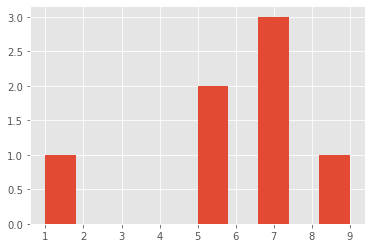

In [82]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.hist([1, 5, 5, 7, 7, 7, 9])
plt.show()

### Combining NLP data extraction with plotting

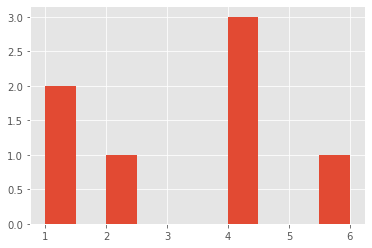

In [83]:
words = word_tokenize("This is a pretty cool tool!")
word_lengths = [len(w) for w in words]

plt.hist(word_lengths)
plt.show()

### Charting practice

Coba gunakan keahlian baru Anda untuk menemukan dan memetakan jumlah kata per baris dalam naskah menggunakan `matplotlib`. Script Holy Grail dimuat untuk Anda, dan Anda perlu menggunakan regex untuk menemukan kata per baris.

In [85]:
# Load data
with open("datasets/grail.txt", "r") as f:
    holy_grail = f.read()

In [86]:
len(holy_grail)

65003

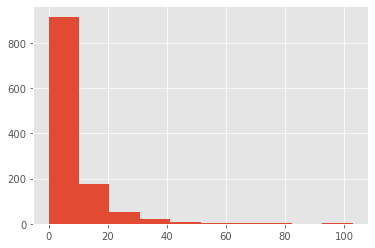

In [88]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()